In [17]:
import pandas as pd
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

# 1. Цена по описанию

## 1. Аналитика

In [2]:
data = pd.read_csv('Shoes_Data.csv')

In [3]:
data.head(5)

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1230 non-null   object
 1   price                1230 non-null   object
 2   rating               1230 non-null   object
 3   total_reviews        1230 non-null   object
 4   product_description  1230 non-null   object
 5   reviews              1230 non-null   object
 6   reviews_rating       1230 non-null   object
 7   Shoe Type            1230 non-null   object
dtypes: object(8)
memory usage: 77.0+ KB


Пропусков нет, отлично! Для того чтоб поанализировать цену, число отзывов и тд, сначала предобработаем их, сделаем числами.

Цена: тут надо проверить, что валюта везде одна и та же.

In [5]:
set(data['price'].apply(lambda x: x[0]))

{'₹'}

Валюта одна. Переводим цену в число, а заодно и рейтинг и общее число отзывов.

In [6]:
data['price'] = data['price'].apply(lambda x: float(x[1:]))

data['rating'] = data['rating'].apply(lambda x: float(x.split()[0]))

data['total_reviews'] = data['total_reviews'].apply(lambda x: int(x.split()[0]))

Посмотрим на статистику.

In [7]:
data.describe()

,price,rating,total_reviews
count,1230.000000,1230.000000,1230.000000
mean,2031.842268,3.964553,815.791057
std,1729.425360,0.468047,3116.057954
min,127.000000,1.000000,1.000000
25%,622.250000,3.800000,26.000000
50%,1588.000000,4.000000,118.000000
75%,2844.687500,4.200000,440.750000
max,7992.000000,5.000000,42193.000000


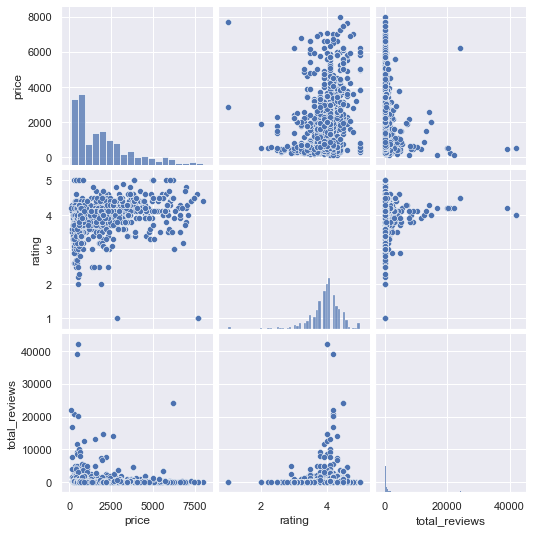

In [8]:
sns.pairplot(data, vars=['price', 'rating', 'total_reviews'])

Выбросов не видно.

## 3 Обработка данных

Стеммим, лемматизируем.

In [9]:
df1 = data[['price', 'product_description']]

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('wordnet')

/Users/kseniiashapka/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/Users/kseniiashapka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more detai

True

In [11]:
pstemmer = PorterStemmer()
wnlemmatizer = WordNetLemmatizer()

def processSentence(sentence):
    words = nltk.word_tokenize(sentence)
    stem_sentence = []
    for word in words:
        sword = pstemmer.stem(wnlemmatizer.lemmatize(word))
        if sword.isalpha():
            stem_sentence.append(pstemmer.stem(word))
    return " ".join(stem_sentence)

In [12]:
processSentence(df1['product_description'][0])

'elev your style with thi classi pair of run shoe from the hous of clymb brand featur a contemporari refin design with except comfort thi pair is perfect to give your quintessenti dress an upgrad'

In [13]:
df1['processed_sentence'] = df1['product_description'].apply(processSentence)

In [14]:
df1.head()

,price,product_description,processed_sentence
0,279.0,Elevate your style with this classy pair of Ru...,elev your style with thi classi pair of run sh...
1,479.0,The product will be an excellent pick for you....,the product will be an excel pick for you It e...
2,430.0,Flaunt with these stylish and unique red casua...,flaunt with these stylish and uniqu red casual...
3,499.0,Robbie Jones Shoes Are Designed To Keeping In ...,robbi jone shoe are design To keep In mind dur...
4,499.0,Sparx is a spectacular range of footwear from ...,sparx is a spectacular rang of footwear from t...


## 3 Векторизуем тексты

Векторизуем tf-idf-ом, им же убирем стоп слова. В результате подкрутки min_df, max_df выбрали достаточно жесткими, иначе получится очень много фичей на такой маленький датасет.

In [18]:
train, test = train_test_split(df1)

In [19]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, min_df=0.05, max_df=0.15)

In [20]:
X_train = tfidf_vectorizer.fit_transform(train['processed_sentence'])
y_train = train['price']

X_test = tfidf_vectorizer.transform(test['processed_sentence'])
y_test = test['price']

## 4. Обучаем модель

Random forest, линейная регрессия.

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [22]:
rf = RandomForestRegressor(n_estimators=200)
gs = GridSearchCV(rf, cv=3, param_grid={'max_depth': [2, 3, 4], 'min_samples_split': [2, 6, 12]}, scoring='neg_mean_absolute_error')
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 3, 4], 'min_samples_split': [2, 6, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [23]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
estimator = gs.best_estimator_
estimator.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [25]:
from sklearn.metrics import mean_absolute_error

print("Train error random forest: ", mean_absolute_error(y_train, estimator.predict(X_train)))
print("Test error random forest", mean_absolute_error(y_test, estimator.predict(X_test)))

Train error random forest:  952.72750387353
Test error random forest 1078.5115210900747


In [26]:
lr = Lasso()
gs = GridSearchCV(lr, cv=3, param_grid={'alpha': [0.1, 1, 10]}, scoring='neg_mean_absolute_error')
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [27]:
gs.best_estimator_

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
estimator = gs.best_estimator_
estimator.fit(X_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
print("Train error Lasso: ", mean_absolute_error(y_train, estimator.predict(X_train)))
print("Test error Lasso: ", mean_absolute_error(y_test, estimator.predict(X_test)))

Train error Lasso:  1.0875736475629352
Test error Lasso:  1.1477911646586345


## 5 Выводы

В случае обеих моделей наблюдается переобучение, однако оно вполне в пределах допустимого. Лассо-регрессия справилась лучше. Это говорит о том, что в целом закономерности линейные: каждое слово влияет либо в плюс, либо в минус, нет такого что эффект слова зависит от контекста (это конечно не абсолютное правило, а лишь тенденция).

Чтоб понять насколько хороша наша MAE-ошибка, можно посмотреть на среднюю цену и ошибку относительно нее (что-то похожее на MAPE, только с перестановкой действий).

In [30]:
test['price'].mean()

2105.130681818182

Ошибаемся примерно на 50% от цены, ну как знать, хорошо это или плохо. 

# 2 Рейтинг по отзыву

## 1 Аналитика

In [31]:
data.head()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,279.0,2.9,2389,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,479.0,3.9,11520,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,430.0,3.3,1251,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,499.0,4.2,3,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,499.0,4.2,20110,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men


Распутываем колонки с отзывами в датасет.

In [32]:
reviews = []
ratings = []
item_ids = []

for item_id, reviews_data in data[['reviews', 'reviews_rating']].iterrows():
    item_reviews = reviews_data['reviews'].split('||')
    reviews_ratings = reviews_data['reviews_rating'].split('||')
    reviews += item_reviews
    ratings += reviews_ratings
    item_ids += [item_id for _ in range(len(item_reviews))]
    
reviews_data = pd.DataFrame({'item_id': item_ids, 'review': reviews, 'rating': ratings})

In [59]:
reviews_data.head()

,item_id,review,rating,processed_review
0,0,Not happy with product,1,not happi with product
1,0,It's not as expected.,1,It not as expect
2,0,AVERAGE PRODUCT,3,averag product
3,0,Pic more beautiful,3,pic more beauti
4,0,Got damage product. But quality is average fo...,3,got damag product but qualiti is averag for


In [34]:
reviews_data['rating'] = reviews_data['rating'].apply(lambda x: int(float(x.split()[0])))

Смотрим распределение рейтингов, гистограмму строить не будем, их всего 5, и так видно.

In [35]:
reviews_data['rating'].value_counts()

5    4944
4    1853
1    1749
3     863
2     549
Name: rating, dtype: int64

# 2 Процессинг текстов

Тут одна строчка, весь код написан в предыдущем пункте.

In [36]:
reviews_data['processed_review'] = reviews_data['review'].apply(processSentence)

In [37]:
reviews_data.head()

,item_id,review,rating,processed_review
0,0,Not happy with product,1,not happi with product
1,0,It's not as expected.,1,It not as expect
2,0,AVERAGE PRODUCT,3,averag product
3,0,Pic more beautiful,3,pic more beauti
4,0,Got damage product. But quality is average fo...,3,got damag product but qualiti is averag for


# 3 Векторизация

Так же бьем на train и test, векторизуем. Единственное, tf-idf делаем менее жестким, так как слов сильно меньше, объектов наоборот больше, в общем, взяли ограничения такими чтоб получить адекватное число фичей.

In [38]:
train, test = train_test_split(reviews_data)

In [39]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, min_df=0.02, max_df=0.50)
X_train = tfidf_vectorizer.fit_transform(train['processed_review'])
y_train = train['rating']

X_test = tfidf_vectorizer.transform(test['processed_review'])
y_test = test['rating']

In [40]:
X_train

<7468x25 sparse matrix of type '<class 'numpy.float64'>'
	with 9943 stored elements in Compressed Sparse Row format>

# 4 Модели

В предыдущем задании линейные модели победили деревянные, попробуем сейчас так же использовать и то и то, но деревянную возьмем помощнее: CatBoost. А в качестве линейной возьмем логистическую регрессию.

In [41]:
from catboost import CatBoostClassifier

In [44]:
cat = CatBoostClassifier()
grid = {'learning_rate': [0.03, 0.1],
        'depth': [2, 4]}

grid_search_result = cat.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True,
                                    verbose=False) 

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.5908771	test: 1.5910397	best: 1.5910397 (0)	total: 8.21ms	remaining: 8.21s
1:	learn: 1.5737214	test: 1.5739563	best: 1.5739563 (1)	total: 13.2ms	remaining: 6.57s
2:	learn: 1.5566314	test: 1.5572076	best: 1.5572076 (2)	total: 17ms	remaining: 5.65s
3:	learn: 1.5421492	test: 1.5429499	best: 1.5429499 (3)	total: 20.6ms	remaining: 5.12s
4:	learn: 1.5279547	test: 1.5290531	best: 1.5290531 (4)	total: 24.3ms	remaining: 4.84s
5:	learn: 1.5152700	test: 1.5164745	best: 1.5164745 (5)	total: 28.4ms	remaining: 4.7s
6:	learn: 1.5030123	test: 1.5046516	best: 1.5046516 (6)	total: 31.2ms	remaining: 4.43s
7:	learn: 1.4915674	test: 1.4935181	best: 1.4935181 (7)	total: 33.9ms	remaining: 4.2s
8:	learn: 1.4812606	test: 1.4834893	best: 1.4834893 (8)	total: 36.8ms	remaining: 4.05s
9:	learn: 1.4710547	test: 1.4733802	best: 1.4733802 (9)	total: 39.6ms	remaining: 3.92s
10:	learn: 1.4619493	test: 1.4644843	best: 1.4644843 (10)	total: 43.2ms	remaining: 3.88s
11:	learn: 1.4537730	test: 1.4564206	best: 1.

104:	learn: 1.2685467	test: 1.2885946	best: 1.2885946 (104)	total: 397ms	remaining: 3.39s
105:	learn: 1.2682731	test: 1.2883476	best: 1.2883476 (105)	total: 401ms	remaining: 3.38s
106:	learn: 1.2680116	test: 1.2882135	best: 1.2882135 (106)	total: 404ms	remaining: 3.37s
107:	learn: 1.2676830	test: 1.2880712	best: 1.2880712 (107)	total: 407ms	remaining: 3.36s
108:	learn: 1.2671802	test: 1.2876980	best: 1.2876980 (108)	total: 410ms	remaining: 3.35s
109:	learn: 1.2668210	test: 1.2875248	best: 1.2875248 (109)	total: 413ms	remaining: 3.34s
110:	learn: 1.2664838	test: 1.2873298	best: 1.2873298 (110)	total: 416ms	remaining: 3.33s
111:	learn: 1.2659502	test: 1.2868509	best: 1.2868509 (111)	total: 419ms	remaining: 3.32s
112:	learn: 1.2655932	test: 1.2866100	best: 1.2866100 (112)	total: 424ms	remaining: 3.32s
113:	learn: 1.2652426	test: 1.2862284	best: 1.2862284 (113)	total: 427ms	remaining: 3.32s
114:	learn: 1.2648789	test: 1.2859178	best: 1.2859178 (114)	total: 431ms	remaining: 3.32s
115:	learn

200:	learn: 1.2400484	test: 1.2651049	best: 1.2651049 (200)	total: 790ms	remaining: 3.14s
201:	learn: 1.2398069	test: 1.2650365	best: 1.2650365 (201)	total: 795ms	remaining: 3.14s
202:	learn: 1.2396080	test: 1.2648009	best: 1.2648009 (202)	total: 799ms	remaining: 3.13s
203:	learn: 1.2392322	test: 1.2643699	best: 1.2643699 (203)	total: 802ms	remaining: 3.13s
204:	learn: 1.2390054	test: 1.2642327	best: 1.2642327 (204)	total: 804ms	remaining: 3.12s
205:	learn: 1.2388493	test: 1.2640126	best: 1.2640126 (205)	total: 809ms	remaining: 3.12s
206:	learn: 1.2385767	test: 1.2637461	best: 1.2637461 (206)	total: 812ms	remaining: 3.11s
207:	learn: 1.2383597	test: 1.2635483	best: 1.2635483 (207)	total: 817ms	remaining: 3.11s
208:	learn: 1.2381791	test: 1.2633383	best: 1.2633383 (208)	total: 822ms	remaining: 3.11s
209:	learn: 1.2380061	test: 1.2632253	best: 1.2632253 (209)	total: 825ms	remaining: 3.1s
210:	learn: 1.2377958	test: 1.2630575	best: 1.2630575 (210)	total: 833ms	remaining: 3.12s
211:	learn:

301:	learn: 1.2198278	test: 1.2480983	best: 1.2480983 (301)	total: 1.18s	remaining: 2.73s
302:	learn: 1.2197132	test: 1.2480167	best: 1.2480167 (302)	total: 1.19s	remaining: 2.73s
303:	learn: 1.2195820	test: 1.2479357	best: 1.2479357 (303)	total: 1.19s	remaining: 2.73s
304:	learn: 1.2194677	test: 1.2478065	best: 1.2478065 (304)	total: 1.2s	remaining: 2.72s
305:	learn: 1.2193264	test: 1.2477042	best: 1.2477042 (305)	total: 1.2s	remaining: 2.72s
306:	learn: 1.2192062	test: 1.2475297	best: 1.2475297 (306)	total: 1.2s	remaining: 2.72s
307:	learn: 1.2191236	test: 1.2474936	best: 1.2474936 (307)	total: 1.21s	remaining: 2.71s
308:	learn: 1.2188617	test: 1.2472226	best: 1.2472226 (308)	total: 1.21s	remaining: 2.71s
309:	learn: 1.2187421	test: 1.2471701	best: 1.2471701 (309)	total: 1.22s	remaining: 2.7s
310:	learn: 1.2185767	test: 1.2469745	best: 1.2469745 (310)	total: 1.22s	remaining: 2.7s
311:	learn: 1.2183887	test: 1.2469345	best: 1.2469345 (311)	total: 1.22s	remaining: 2.69s
312:	learn: 1.2

410:	learn: 1.2057879	test: 1.2366333	best: 1.2366333 (410)	total: 1.57s	remaining: 2.25s
411:	learn: 1.2057449	test: 1.2365845	best: 1.2365845 (411)	total: 1.58s	remaining: 2.25s
412:	learn: 1.2056405	test: 1.2365797	best: 1.2365797 (412)	total: 1.58s	remaining: 2.25s
413:	learn: 1.2055738	test: 1.2365493	best: 1.2365493 (413)	total: 1.59s	remaining: 2.25s
414:	learn: 1.2054553	test: 1.2364526	best: 1.2364526 (414)	total: 1.59s	remaining: 2.24s
415:	learn: 1.2053496	test: 1.2363409	best: 1.2363409 (415)	total: 1.6s	remaining: 2.24s
416:	learn: 1.2052954	test: 1.2363571	best: 1.2363409 (415)	total: 1.6s	remaining: 2.24s
417:	learn: 1.2051569	test: 1.2362894	best: 1.2362894 (417)	total: 1.61s	remaining: 2.24s
418:	learn: 1.2050621	test: 1.2361677	best: 1.2361677 (418)	total: 1.61s	remaining: 2.23s
419:	learn: 1.2049446	test: 1.2360938	best: 1.2360938 (419)	total: 1.61s	remaining: 2.23s
420:	learn: 1.2048026	test: 1.2360238	best: 1.2360238 (420)	total: 1.62s	remaining: 2.22s
421:	learn: 

513:	learn: 1.1959273	test: 1.2295858	best: 1.2295858 (513)	total: 1.96s	remaining: 1.85s
514:	learn: 1.1958509	test: 1.2294832	best: 1.2294832 (514)	total: 1.97s	remaining: 1.85s
515:	learn: 1.1958147	test: 1.2294463	best: 1.2294463 (515)	total: 1.97s	remaining: 1.85s
516:	learn: 1.1957447	test: 1.2294302	best: 1.2294302 (516)	total: 1.98s	remaining: 1.85s
517:	learn: 1.1956662	test: 1.2293733	best: 1.2293733 (517)	total: 1.98s	remaining: 1.84s
518:	learn: 1.1956087	test: 1.2293561	best: 1.2293561 (518)	total: 1.99s	remaining: 1.84s
519:	learn: 1.1955319	test: 1.2293113	best: 1.2293113 (519)	total: 1.99s	remaining: 1.84s
520:	learn: 1.1954592	test: 1.2292802	best: 1.2292802 (520)	total: 2s	remaining: 1.83s
521:	learn: 1.1953769	test: 1.2292898	best: 1.2292802 (520)	total: 2s	remaining: 1.83s
522:	learn: 1.1953235	test: 1.2292886	best: 1.2292802 (520)	total: 2s	remaining: 1.82s
523:	learn: 1.1952816	test: 1.2292145	best: 1.2292145 (523)	total: 2s	remaining: 1.82s
524:	learn: 1.1952502	

610:	learn: 1.1894662	test: 1.2249997	best: 1.2249997 (610)	total: 2.36s	remaining: 1.5s
611:	learn: 1.1894262	test: 1.2249699	best: 1.2249699 (611)	total: 2.37s	remaining: 1.5s
612:	learn: 1.1893880	test: 1.2249241	best: 1.2249241 (612)	total: 2.37s	remaining: 1.5s
613:	learn: 1.1893106	test: 1.2249202	best: 1.2249202 (613)	total: 2.37s	remaining: 1.49s
614:	learn: 1.1892774	test: 1.2249164	best: 1.2249164 (614)	total: 2.38s	remaining: 1.49s
615:	learn: 1.1892231	test: 1.2249201	best: 1.2249164 (614)	total: 2.38s	remaining: 1.49s
616:	learn: 1.1891832	test: 1.2248699	best: 1.2248699 (616)	total: 2.39s	remaining: 1.48s
617:	learn: 1.1890757	test: 1.2248143	best: 1.2248143 (617)	total: 2.39s	remaining: 1.48s
618:	learn: 1.1890284	test: 1.2247617	best: 1.2247617 (618)	total: 2.39s	remaining: 1.47s
619:	learn: 1.1889926	test: 1.2247519	best: 1.2247519 (619)	total: 2.4s	remaining: 1.47s
620:	learn: 1.1889597	test: 1.2247584	best: 1.2247519 (619)	total: 2.4s	remaining: 1.46s
621:	learn: 1.1

711:	learn: 1.1839336	test: 1.2217987	best: 1.2217987 (711)	total: 2.76s	remaining: 1.11s
712:	learn: 1.1838445	test: 1.2217427	best: 1.2217427 (712)	total: 2.76s	remaining: 1.11s
713:	learn: 1.1838070	test: 1.2217805	best: 1.2217427 (712)	total: 2.77s	remaining: 1.11s
714:	learn: 1.1837661	test: 1.2217323	best: 1.2217323 (714)	total: 2.77s	remaining: 1.1s
715:	learn: 1.1836978	test: 1.2216824	best: 1.2216824 (715)	total: 2.77s	remaining: 1.1s
716:	learn: 1.1836226	test: 1.2216728	best: 1.2216728 (716)	total: 2.78s	remaining: 1.1s
717:	learn: 1.1835710	test: 1.2216756	best: 1.2216728 (716)	total: 2.78s	remaining: 1.09s
718:	learn: 1.1834798	test: 1.2216418	best: 1.2216418 (718)	total: 2.78s	remaining: 1.09s
719:	learn: 1.1834373	test: 1.2216060	best: 1.2216060 (719)	total: 2.79s	remaining: 1.08s
720:	learn: 1.1833943	test: 1.2215380	best: 1.2215380 (720)	total: 2.79s	remaining: 1.08s
721:	learn: 1.1833172	test: 1.2215107	best: 1.2215107 (721)	total: 2.8s	remaining: 1.08s
722:	learn: 1.

815:	learn: 1.1792981	test: 1.2193759	best: 1.2193691 (814)	total: 3.15s	remaining: 711ms
816:	learn: 1.1792473	test: 1.2193065	best: 1.2193065 (816)	total: 3.15s	remaining: 707ms
817:	learn: 1.1792330	test: 1.2192797	best: 1.2192797 (817)	total: 3.16s	remaining: 703ms
818:	learn: 1.1791943	test: 1.2192978	best: 1.2192797 (817)	total: 3.16s	remaining: 699ms
819:	learn: 1.1791825	test: 1.2192871	best: 1.2192797 (817)	total: 3.17s	remaining: 695ms
820:	learn: 1.1791499	test: 1.2192608	best: 1.2192608 (820)	total: 3.17s	remaining: 691ms
821:	learn: 1.1791152	test: 1.2192572	best: 1.2192572 (821)	total: 3.17s	remaining: 688ms
822:	learn: 1.1790644	test: 1.2191896	best: 1.2191896 (822)	total: 3.18s	remaining: 684ms
823:	learn: 1.1790400	test: 1.2192212	best: 1.2191896 (822)	total: 3.18s	remaining: 680ms
824:	learn: 1.1789804	test: 1.2192370	best: 1.2191896 (822)	total: 3.19s	remaining: 676ms
825:	learn: 1.1789310	test: 1.2192072	best: 1.2191896 (822)	total: 3.19s	remaining: 672ms
826:	learn

919:	learn: 1.1756232	test: 1.2179491	best: 1.2179491 (919)	total: 3.55s	remaining: 308ms
920:	learn: 1.1755823	test: 1.2179195	best: 1.2179195 (920)	total: 3.56s	remaining: 305ms
921:	learn: 1.1755600	test: 1.2179067	best: 1.2179067 (921)	total: 3.56s	remaining: 301ms
922:	learn: 1.1755335	test: 1.2178754	best: 1.2178754 (922)	total: 3.56s	remaining: 297ms
923:	learn: 1.1755036	test: 1.2178476	best: 1.2178476 (923)	total: 3.57s	remaining: 294ms
924:	learn: 1.1754837	test: 1.2178507	best: 1.2178476 (923)	total: 3.57s	remaining: 290ms
925:	learn: 1.1754547	test: 1.2178456	best: 1.2178456 (925)	total: 3.58s	remaining: 286ms
926:	learn: 1.1754329	test: 1.2178557	best: 1.2178456 (925)	total: 3.58s	remaining: 282ms
927:	learn: 1.1754057	test: 1.2178796	best: 1.2178456 (925)	total: 3.59s	remaining: 278ms
928:	learn: 1.1753748	test: 1.2178151	best: 1.2178151 (928)	total: 3.59s	remaining: 274ms
929:	learn: 1.1753259	test: 1.2177747	best: 1.2177747 (929)	total: 3.59s	remaining: 271ms
930:	learn

60:	learn: 1.2384403	test: 1.2639668	best: 1.2639668 (60)	total: 224ms	remaining: 3.45s
61:	learn: 1.2374464	test: 1.2630166	best: 1.2630166 (61)	total: 230ms	remaining: 3.48s
62:	learn: 1.2365850	test: 1.2625877	best: 1.2625877 (62)	total: 237ms	remaining: 3.52s
63:	learn: 1.2360752	test: 1.2623163	best: 1.2623163 (63)	total: 241ms	remaining: 3.52s
64:	learn: 1.2352723	test: 1.2614427	best: 1.2614427 (64)	total: 245ms	remaining: 3.52s
65:	learn: 1.2344577	test: 1.2607834	best: 1.2607834 (65)	total: 249ms	remaining: 3.53s
66:	learn: 1.2338988	test: 1.2599000	best: 1.2599000 (66)	total: 253ms	remaining: 3.53s
67:	learn: 1.2332618	test: 1.2593257	best: 1.2593257 (67)	total: 258ms	remaining: 3.53s
68:	learn: 1.2326233	test: 1.2588534	best: 1.2588534 (68)	total: 261ms	remaining: 3.52s
69:	learn: 1.2318111	test: 1.2585943	best: 1.2585943 (69)	total: 265ms	remaining: 3.52s
70:	learn: 1.2311628	test: 1.2582134	best: 1.2582134 (70)	total: 268ms	remaining: 3.5s
71:	learn: 1.2307856	test: 1.2581

158:	learn: 1.1943897	test: 1.2288797	best: 1.2287847 (156)	total: 612ms	remaining: 3.24s
159:	learn: 1.1941715	test: 1.2285372	best: 1.2285372 (159)	total: 620ms	remaining: 3.25s
160:	learn: 1.1939093	test: 1.2283806	best: 1.2283806 (160)	total: 626ms	remaining: 3.26s
161:	learn: 1.1935521	test: 1.2279962	best: 1.2279962 (161)	total: 631ms	remaining: 3.26s
162:	learn: 1.1934658	test: 1.2278756	best: 1.2278756 (162)	total: 636ms	remaining: 3.27s
163:	learn: 1.1931773	test: 1.2277410	best: 1.2277410 (163)	total: 641ms	remaining: 3.27s
164:	learn: 1.1930478	test: 1.2277225	best: 1.2277225 (164)	total: 645ms	remaining: 3.26s
165:	learn: 1.1928480	test: 1.2275011	best: 1.2275011 (165)	total: 648ms	remaining: 3.26s
166:	learn: 1.1926201	test: 1.2273056	best: 1.2273056 (166)	total: 651ms	remaining: 3.25s
167:	learn: 1.1924232	test: 1.2273063	best: 1.2273056 (166)	total: 655ms	remaining: 3.24s
168:	learn: 1.1922297	test: 1.2271067	best: 1.2271067 (168)	total: 658ms	remaining: 3.23s
169:	learn

260:	learn: 1.1776093	test: 1.2194141	best: 1.2194141 (260)	total: 1s	remaining: 2.84s
261:	learn: 1.1773892	test: 1.2192300	best: 1.2192300 (261)	total: 1.01s	remaining: 2.84s
262:	learn: 1.1771889	test: 1.2190742	best: 1.2190742 (262)	total: 1.01s	remaining: 2.84s
263:	learn: 1.1771126	test: 1.2190125	best: 1.2190125 (263)	total: 1.02s	remaining: 2.84s
264:	learn: 1.1770145	test: 1.2190335	best: 1.2190125 (263)	total: 1.02s	remaining: 2.83s
265:	learn: 1.1767869	test: 1.2189583	best: 1.2189583 (265)	total: 1.02s	remaining: 2.83s
266:	learn: 1.1767099	test: 1.2189281	best: 1.2189281 (266)	total: 1.03s	remaining: 2.82s
267:	learn: 1.1766045	test: 1.2188653	best: 1.2188653 (267)	total: 1.03s	remaining: 2.81s
268:	learn: 1.1764317	test: 1.2187368	best: 1.2187368 (268)	total: 1.03s	remaining: 2.81s
269:	learn: 1.1762344	test: 1.2188164	best: 1.2187368 (268)	total: 1.03s	remaining: 2.8s
270:	learn: 1.1762119	test: 1.2187974	best: 1.2187368 (268)	total: 1.04s	remaining: 2.8s
271:	learn: 1.1

353:	learn: 1.1683312	test: 1.2156420	best: 1.2155919 (352)	total: 1.4s	remaining: 2.55s
354:	learn: 1.1682853	test: 1.2155819	best: 1.2155819 (354)	total: 1.4s	remaining: 2.55s
355:	learn: 1.1682734	test: 1.2155783	best: 1.2155783 (355)	total: 1.4s	remaining: 2.54s
356:	learn: 1.1682251	test: 1.2156019	best: 1.2155783 (355)	total: 1.41s	remaining: 2.54s
357:	learn: 1.1681515	test: 1.2155867	best: 1.2155783 (355)	total: 1.41s	remaining: 2.53s
358:	learn: 1.1680945	test: 1.2156036	best: 1.2155783 (355)	total: 1.42s	remaining: 2.53s
359:	learn: 1.1680515	test: 1.2156716	best: 1.2155783 (355)	total: 1.42s	remaining: 2.52s
360:	learn: 1.1679507	test: 1.2156712	best: 1.2155783 (355)	total: 1.42s	remaining: 2.52s
361:	learn: 1.1678658	test: 1.2156115	best: 1.2155783 (355)	total: 1.43s	remaining: 2.52s
362:	learn: 1.1677891	test: 1.2155445	best: 1.2155445 (362)	total: 1.43s	remaining: 2.51s
363:	learn: 1.1677197	test: 1.2155387	best: 1.2155387 (363)	total: 1.43s	remaining: 2.5s
364:	learn: 1.

453:	learn: 1.1622085	test: 1.2148481	best: 1.2142102 (415)	total: 1.79s	remaining: 2.15s
454:	learn: 1.1621524	test: 1.2148352	best: 1.2142102 (415)	total: 1.79s	remaining: 2.15s
455:	learn: 1.1621330	test: 1.2148817	best: 1.2142102 (415)	total: 1.8s	remaining: 2.14s
456:	learn: 1.1620234	test: 1.2148710	best: 1.2142102 (415)	total: 1.8s	remaining: 2.14s
457:	learn: 1.1620124	test: 1.2148913	best: 1.2142102 (415)	total: 1.8s	remaining: 2.13s
458:	learn: 1.1619839	test: 1.2149419	best: 1.2142102 (415)	total: 1.81s	remaining: 2.13s
459:	learn: 1.1618692	test: 1.2148297	best: 1.2142102 (415)	total: 1.81s	remaining: 2.13s
460:	learn: 1.1618489	test: 1.2148507	best: 1.2142102 (415)	total: 1.81s	remaining: 2.12s
461:	learn: 1.1617945	test: 1.2148479	best: 1.2142102 (415)	total: 1.82s	remaining: 2.12s
462:	learn: 1.1617803	test: 1.2148221	best: 1.2142102 (415)	total: 1.82s	remaining: 2.12s
463:	learn: 1.1617542	test: 1.2148020	best: 1.2142102 (415)	total: 1.83s	remaining: 2.11s
464:	learn: 1

555:	learn: 1.1569170	test: 1.2137513	best: 1.2137513 (555)	total: 2.18s	remaining: 1.74s
556:	learn: 1.1568915	test: 1.2137250	best: 1.2137250 (556)	total: 2.19s	remaining: 1.74s
557:	learn: 1.1567555	test: 1.2136793	best: 1.2136793 (557)	total: 2.2s	remaining: 1.74s
558:	learn: 1.1567194	test: 1.2137623	best: 1.2136793 (557)	total: 2.2s	remaining: 1.74s
559:	learn: 1.1566960	test: 1.2137538	best: 1.2136793 (557)	total: 2.21s	remaining: 1.74s
560:	learn: 1.1566586	test: 1.2137350	best: 1.2136793 (557)	total: 2.21s	remaining: 1.73s
561:	learn: 1.1566048	test: 1.2137880	best: 1.2136793 (557)	total: 2.22s	remaining: 1.73s
562:	learn: 1.1565279	test: 1.2137102	best: 1.2136793 (557)	total: 2.22s	remaining: 1.73s
563:	learn: 1.1564994	test: 1.2137164	best: 1.2136793 (557)	total: 2.23s	remaining: 1.72s
564:	learn: 1.1564706	test: 1.2136938	best: 1.2136793 (557)	total: 2.23s	remaining: 1.72s
565:	learn: 1.1564546	test: 1.2137266	best: 1.2136793 (557)	total: 2.24s	remaining: 1.72s
566:	learn: 

654:	learn: 1.1528493	test: 1.2127331	best: 1.2125835 (643)	total: 2.58s	remaining: 1.36s
655:	learn: 1.1528288	test: 1.2127457	best: 1.2125835 (643)	total: 2.58s	remaining: 1.35s
656:	learn: 1.1528072	test: 1.2127795	best: 1.2125835 (643)	total: 2.59s	remaining: 1.35s
657:	learn: 1.1527897	test: 1.2127789	best: 1.2125835 (643)	total: 2.6s	remaining: 1.35s
658:	learn: 1.1527432	test: 1.2127658	best: 1.2125835 (643)	total: 2.6s	remaining: 1.35s
659:	learn: 1.1527064	test: 1.2127425	best: 1.2125835 (643)	total: 2.6s	remaining: 1.34s
660:	learn: 1.1526785	test: 1.2127424	best: 1.2125835 (643)	total: 2.61s	remaining: 1.34s
661:	learn: 1.1526368	test: 1.2126469	best: 1.2125835 (643)	total: 2.61s	remaining: 1.33s
662:	learn: 1.1526155	test: 1.2126586	best: 1.2125835 (643)	total: 2.62s	remaining: 1.33s
663:	learn: 1.1525919	test: 1.2126141	best: 1.2125835 (643)	total: 2.62s	remaining: 1.33s
664:	learn: 1.1525642	test: 1.2126179	best: 1.2125835 (643)	total: 2.63s	remaining: 1.32s
665:	learn: 1

754:	learn: 1.1494239	test: 1.2118795	best: 1.2117951 (744)	total: 2.97s	remaining: 963ms
755:	learn: 1.1493367	test: 1.2118651	best: 1.2117951 (744)	total: 2.97s	remaining: 960ms
756:	learn: 1.1493099	test: 1.2118672	best: 1.2117951 (744)	total: 2.98s	remaining: 956ms
757:	learn: 1.1492659	test: 1.2118652	best: 1.2117951 (744)	total: 2.98s	remaining: 952ms
758:	learn: 1.1492457	test: 1.2118870	best: 1.2117951 (744)	total: 2.99s	remaining: 948ms
759:	learn: 1.1492336	test: 1.2118920	best: 1.2117951 (744)	total: 3s	remaining: 946ms
760:	learn: 1.1491319	test: 1.2117652	best: 1.2117652 (760)	total: 3s	remaining: 942ms
761:	learn: 1.1491188	test: 1.2117779	best: 1.2117652 (760)	total: 3s	remaining: 938ms
762:	learn: 1.1490601	test: 1.2117522	best: 1.2117522 (762)	total: 3.01s	remaining: 934ms
763:	learn: 1.1490283	test: 1.2117756	best: 1.2117522 (762)	total: 3.01s	remaining: 930ms
764:	learn: 1.1489958	test: 1.2117293	best: 1.2117293 (764)	total: 3.02s	remaining: 926ms
765:	learn: 1.14896

855:	learn: 1.1466526	test: 1.2111717	best: 1.2111464 (853)	total: 3.37s	remaining: 566ms
856:	learn: 1.1466197	test: 1.2112017	best: 1.2111464 (853)	total: 3.37s	remaining: 562ms
857:	learn: 1.1466145	test: 1.2112070	best: 1.2111464 (853)	total: 3.38s	remaining: 559ms
858:	learn: 1.1465854	test: 1.2111372	best: 1.2111372 (858)	total: 3.38s	remaining: 555ms
859:	learn: 1.1465375	test: 1.2111111	best: 1.2111111 (859)	total: 3.39s	remaining: 551ms
860:	learn: 1.1465018	test: 1.2110883	best: 1.2110883 (860)	total: 3.39s	remaining: 547ms
861:	learn: 1.1464449	test: 1.2110327	best: 1.2110327 (861)	total: 3.39s	remaining: 543ms
862:	learn: 1.1464233	test: 1.2110031	best: 1.2110031 (862)	total: 3.4s	remaining: 539ms
863:	learn: 1.1463918	test: 1.2109798	best: 1.2109798 (863)	total: 3.4s	remaining: 535ms
864:	learn: 1.1463845	test: 1.2110159	best: 1.2109798 (863)	total: 3.4s	remaining: 531ms
865:	learn: 1.1462647	test: 1.2110823	best: 1.2109798 (863)	total: 3.4s	remaining: 527ms
866:	learn: 1.

953:	learn: 1.1440932	test: 1.2116464	best: 1.2109798 (863)	total: 3.75s	remaining: 181ms
954:	learn: 1.1440544	test: 1.2116798	best: 1.2109798 (863)	total: 3.76s	remaining: 177ms
955:	learn: 1.1440467	test: 1.2116779	best: 1.2109798 (863)	total: 3.76s	remaining: 173ms
956:	learn: 1.1440398	test: 1.2116619	best: 1.2109798 (863)	total: 3.77s	remaining: 169ms
957:	learn: 1.1440313	test: 1.2116149	best: 1.2109798 (863)	total: 3.77s	remaining: 165ms
958:	learn: 1.1440098	test: 1.2116911	best: 1.2109798 (863)	total: 3.77s	remaining: 161ms
959:	learn: 1.1439903	test: 1.2116853	best: 1.2109798 (863)	total: 3.77s	remaining: 157ms
960:	learn: 1.1439697	test: 1.2116395	best: 1.2109798 (863)	total: 3.78s	remaining: 153ms
961:	learn: 1.1439572	test: 1.2116306	best: 1.2109798 (863)	total: 3.78s	remaining: 149ms
962:	learn: 1.1439516	test: 1.2116024	best: 1.2109798 (863)	total: 3.78s	remaining: 145ms
963:	learn: 1.1439283	test: 1.2116212	best: 1.2109798 (863)	total: 3.79s	remaining: 141ms
964:	learn

77:	learn: 1.2588658	test: 1.2795963	best: 1.2795963 (77)	total: 416ms	remaining: 4.92s
78:	learn: 1.2581873	test: 1.2790697	best: 1.2790697 (78)	total: 420ms	remaining: 4.9s
79:	learn: 1.2570549	test: 1.2781196	best: 1.2781196 (79)	total: 425ms	remaining: 4.89s
80:	learn: 1.2561715	test: 1.2773154	best: 1.2773154 (80)	total: 429ms	remaining: 4.86s
81:	learn: 1.2554303	test: 1.2767379	best: 1.2767379 (81)	total: 433ms	remaining: 4.84s
82:	learn: 1.2544835	test: 1.2758948	best: 1.2758948 (82)	total: 438ms	remaining: 4.84s
83:	learn: 1.2537881	test: 1.2754476	best: 1.2754476 (83)	total: 447ms	remaining: 4.87s
84:	learn: 1.2532290	test: 1.2749693	best: 1.2749693 (84)	total: 454ms	remaining: 4.89s
85:	learn: 1.2524321	test: 1.2743181	best: 1.2743181 (85)	total: 462ms	remaining: 4.91s
86:	learn: 1.2517230	test: 1.2737892	best: 1.2737892 (86)	total: 470ms	remaining: 4.93s
87:	learn: 1.2510439	test: 1.2733432	best: 1.2733432 (87)	total: 475ms	remaining: 4.92s
88:	learn: 1.2504116	test: 1.2730

196:	learn: 1.2087049	test: 1.2420514	best: 1.2420514 (196)	total: 1.01s	remaining: 4.13s
197:	learn: 1.2084741	test: 1.2418458	best: 1.2418458 (197)	total: 1.02s	remaining: 4.13s
198:	learn: 1.2082660	test: 1.2417170	best: 1.2417170 (198)	total: 1.02s	remaining: 4.13s
199:	learn: 1.2079567	test: 1.2413791	best: 1.2413791 (199)	total: 1.03s	remaining: 4.12s
200:	learn: 1.2076097	test: 1.2410288	best: 1.2410288 (200)	total: 1.04s	remaining: 4.13s
201:	learn: 1.2073967	test: 1.2409321	best: 1.2409321 (201)	total: 1.04s	remaining: 4.13s
202:	learn: 1.2071605	test: 1.2407507	best: 1.2407507 (202)	total: 1.05s	remaining: 4.13s
203:	learn: 1.2069571	test: 1.2405718	best: 1.2405718 (203)	total: 1.06s	remaining: 4.12s
204:	learn: 1.2067013	test: 1.2404078	best: 1.2404078 (204)	total: 1.06s	remaining: 4.11s
205:	learn: 1.2065250	test: 1.2403338	best: 1.2403338 (205)	total: 1.06s	remaining: 4.1s
206:	learn: 1.2062855	test: 1.2401382	best: 1.2401382 (206)	total: 1.07s	remaining: 4.09s
207:	learn:

307:	learn: 1.1876059	test: 1.2273362	best: 1.2273362 (307)	total: 1.61s	remaining: 3.61s
308:	learn: 1.1874546	test: 1.2272871	best: 1.2272871 (308)	total: 1.61s	remaining: 3.61s
309:	learn: 1.1872787	test: 1.2271545	best: 1.2271545 (309)	total: 1.62s	remaining: 3.61s
310:	learn: 1.1871581	test: 1.2271224	best: 1.2271224 (310)	total: 1.63s	remaining: 3.61s
311:	learn: 1.1870173	test: 1.2270494	best: 1.2270494 (311)	total: 1.63s	remaining: 3.6s
312:	learn: 1.1868903	test: 1.2270442	best: 1.2270442 (312)	total: 1.64s	remaining: 3.6s
313:	learn: 1.1866504	test: 1.2268882	best: 1.2268882 (313)	total: 1.65s	remaining: 3.59s
314:	learn: 1.1865473	test: 1.2267615	best: 1.2267615 (314)	total: 1.65s	remaining: 3.59s
315:	learn: 1.1863833	test: 1.2268037	best: 1.2267615 (314)	total: 1.65s	remaining: 3.58s
316:	learn: 1.1862305	test: 1.2266792	best: 1.2266792 (316)	total: 1.66s	remaining: 3.57s
317:	learn: 1.1860584	test: 1.2265573	best: 1.2265573 (317)	total: 1.66s	remaining: 3.56s
318:	learn: 

419:	learn: 1.1743059	test: 1.2205606	best: 1.2205505 (418)	total: 2.21s	remaining: 3.05s
420:	learn: 1.1742018	test: 1.2206123	best: 1.2205505 (418)	total: 2.21s	remaining: 3.04s
421:	learn: 1.1741271	test: 1.2205833	best: 1.2205505 (418)	total: 2.22s	remaining: 3.04s
422:	learn: 1.1740148	test: 1.2205549	best: 1.2205505 (418)	total: 2.22s	remaining: 3.03s
423:	learn: 1.1739433	test: 1.2205545	best: 1.2205505 (418)	total: 2.23s	remaining: 3.02s
424:	learn: 1.1738378	test: 1.2205331	best: 1.2205331 (424)	total: 2.23s	remaining: 3.02s
425:	learn: 1.1737404	test: 1.2204360	best: 1.2204360 (425)	total: 2.24s	remaining: 3.01s
426:	learn: 1.1736127	test: 1.2203421	best: 1.2203421 (426)	total: 2.24s	remaining: 3.01s
427:	learn: 1.1734838	test: 1.2202076	best: 1.2202076 (427)	total: 2.24s	remaining: 3s
428:	learn: 1.1733936	test: 1.2201944	best: 1.2201944 (428)	total: 2.25s	remaining: 2.99s
429:	learn: 1.1733143	test: 1.2201970	best: 1.2201944 (428)	total: 2.25s	remaining: 2.98s
430:	learn: 1

531:	learn: 1.1649670	test: 1.2171645	best: 1.2171645 (531)	total: 2.8s	remaining: 2.46s
532:	learn: 1.1648633	test: 1.2171226	best: 1.2171226 (532)	total: 2.8s	remaining: 2.46s
533:	learn: 1.1648200	test: 1.2171072	best: 1.2171072 (533)	total: 2.81s	remaining: 2.45s
534:	learn: 1.1647682	test: 1.2170564	best: 1.2170564 (534)	total: 2.81s	remaining: 2.45s
535:	learn: 1.1646825	test: 1.2169643	best: 1.2169643 (535)	total: 2.82s	remaining: 2.44s
536:	learn: 1.1646214	test: 1.2169610	best: 1.2169610 (536)	total: 2.82s	remaining: 2.43s
537:	learn: 1.1645776	test: 1.2169244	best: 1.2169244 (537)	total: 2.83s	remaining: 2.43s
538:	learn: 1.1645199	test: 1.2168774	best: 1.2168774 (538)	total: 2.83s	remaining: 2.42s
539:	learn: 1.1644904	test: 1.2168475	best: 1.2168475 (539)	total: 2.84s	remaining: 2.42s
540:	learn: 1.1644242	test: 1.2168035	best: 1.2168035 (540)	total: 2.85s	remaining: 2.42s
541:	learn: 1.1643534	test: 1.2167840	best: 1.2167840 (541)	total: 2.85s	remaining: 2.41s
542:	learn: 

640:	learn: 1.1585443	test: 1.2155251	best: 1.2154642 (638)	total: 3.4s	remaining: 1.9s
641:	learn: 1.1585050	test: 1.2155287	best: 1.2154642 (638)	total: 3.4s	remaining: 1.9s
642:	learn: 1.1584790	test: 1.2155285	best: 1.2154642 (638)	total: 3.41s	remaining: 1.89s
643:	learn: 1.1584207	test: 1.2155185	best: 1.2154642 (638)	total: 3.42s	remaining: 1.89s
644:	learn: 1.1583798	test: 1.2155340	best: 1.2154642 (638)	total: 3.42s	remaining: 1.88s
645:	learn: 1.1583268	test: 1.2155551	best: 1.2154642 (638)	total: 3.43s	remaining: 1.88s
646:	learn: 1.1582712	test: 1.2155604	best: 1.2154642 (638)	total: 3.43s	remaining: 1.87s
647:	learn: 1.1582513	test: 1.2155662	best: 1.2154642 (638)	total: 3.44s	remaining: 1.87s
648:	learn: 1.1581982	test: 1.2156024	best: 1.2154642 (638)	total: 3.44s	remaining: 1.86s
649:	learn: 1.1581155	test: 1.2156018	best: 1.2154642 (638)	total: 3.45s	remaining: 1.86s
650:	learn: 1.1580731	test: 1.2156233	best: 1.2154642 (638)	total: 3.46s	remaining: 1.85s
651:	learn: 1.

760:	learn: 1.1534094	test: 1.2147053	best: 1.2146548 (754)	total: 3.99s	remaining: 1.25s
761:	learn: 1.1533574	test: 1.2146692	best: 1.2146548 (754)	total: 4s	remaining: 1.25s
762:	learn: 1.1532906	test: 1.2146418	best: 1.2146418 (762)	total: 4.01s	remaining: 1.24s
763:	learn: 1.1532547	test: 1.2146205	best: 1.2146205 (763)	total: 4.01s	remaining: 1.24s
764:	learn: 1.1532162	test: 1.2146429	best: 1.2146205 (763)	total: 4.02s	remaining: 1.23s
765:	learn: 1.1531872	test: 1.2146382	best: 1.2146205 (763)	total: 4.03s	remaining: 1.23s
766:	learn: 1.1531661	test: 1.2146250	best: 1.2146205 (763)	total: 4.03s	remaining: 1.22s
767:	learn: 1.1531321	test: 1.2146140	best: 1.2146140 (767)	total: 4.04s	remaining: 1.22s
768:	learn: 1.1530892	test: 1.2145699	best: 1.2145699 (768)	total: 4.04s	remaining: 1.21s
769:	learn: 1.1530607	test: 1.2145765	best: 1.2145699 (768)	total: 4.05s	remaining: 1.21s
770:	learn: 1.1530356	test: 1.2145352	best: 1.2145352 (770)	total: 4.05s	remaining: 1.2s
771:	learn: 1.

875:	learn: 1.1490938	test: 1.2141510	best: 1.2140523 (831)	total: 4.59s	remaining: 649ms
876:	learn: 1.1490523	test: 1.2141052	best: 1.2140523 (831)	total: 4.59s	remaining: 645ms
877:	learn: 1.1490245	test: 1.2141170	best: 1.2140523 (831)	total: 4.6s	remaining: 639ms
878:	learn: 1.1489906	test: 1.2140936	best: 1.2140523 (831)	total: 4.61s	remaining: 635ms
879:	learn: 1.1489403	test: 1.2140724	best: 1.2140523 (831)	total: 4.62s	remaining: 630ms
880:	learn: 1.1488888	test: 1.2141182	best: 1.2140523 (831)	total: 4.62s	remaining: 625ms
881:	learn: 1.1488668	test: 1.2141118	best: 1.2140523 (831)	total: 4.63s	remaining: 619ms
882:	learn: 1.1488235	test: 1.2141121	best: 1.2140523 (831)	total: 4.63s	remaining: 614ms
883:	learn: 1.1487895	test: 1.2141507	best: 1.2140523 (831)	total: 4.64s	remaining: 609ms
884:	learn: 1.1487523	test: 1.2140855	best: 1.2140523 (831)	total: 4.64s	remaining: 603ms
885:	learn: 1.1487403	test: 1.2140902	best: 1.2140523 (831)	total: 4.65s	remaining: 598ms
886:	learn:

982:	learn: 1.1454163	test: 1.2135165	best: 1.2135060 (977)	total: 5.19s	remaining: 89.8ms
983:	learn: 1.1453877	test: 1.2135454	best: 1.2135060 (977)	total: 5.19s	remaining: 84.5ms
984:	learn: 1.1453653	test: 1.2135495	best: 1.2135060 (977)	total: 5.2s	remaining: 79.2ms
985:	learn: 1.1453340	test: 1.2135027	best: 1.2135027 (985)	total: 5.21s	remaining: 73.9ms
986:	learn: 1.1453008	test: 1.2134696	best: 1.2134696 (986)	total: 5.21s	remaining: 68.6ms
987:	learn: 1.1452478	test: 1.2134666	best: 1.2134666 (987)	total: 5.21s	remaining: 63.3ms
988:	learn: 1.1451946	test: 1.2134661	best: 1.2134661 (988)	total: 5.22s	remaining: 58.1ms
989:	learn: 1.1451639	test: 1.2135048	best: 1.2134661 (988)	total: 5.22s	remaining: 52.8ms
990:	learn: 1.1451159	test: 1.2134682	best: 1.2134661 (988)	total: 5.23s	remaining: 47.5ms
991:	learn: 1.1450828	test: 1.2134827	best: 1.2134661 (988)	total: 5.23s	remaining: 42.2ms
992:	learn: 1.1450499	test: 1.2134477	best: 1.2134477 (992)	total: 5.24s	remaining: 36.9ms


101:	learn: 1.1835694	test: 1.2243449	best: 1.2243449 (101)	total: 504ms	remaining: 4.43s
102:	learn: 1.1830781	test: 1.2244970	best: 1.2243449 (101)	total: 511ms	remaining: 4.45s
103:	learn: 1.1826283	test: 1.2241205	best: 1.2241205 (103)	total: 517ms	remaining: 4.45s
104:	learn: 1.1822615	test: 1.2239333	best: 1.2239333 (104)	total: 522ms	remaining: 4.45s
105:	learn: 1.1819361	test: 1.2235900	best: 1.2235900 (105)	total: 528ms	remaining: 4.45s
106:	learn: 1.1816364	test: 1.2233618	best: 1.2233618 (106)	total: 532ms	remaining: 4.44s
107:	learn: 1.1809304	test: 1.2230251	best: 1.2230251 (107)	total: 537ms	remaining: 4.43s
108:	learn: 1.1807238	test: 1.2231666	best: 1.2230251 (107)	total: 540ms	remaining: 4.42s
109:	learn: 1.1803301	test: 1.2230189	best: 1.2230189 (109)	total: 545ms	remaining: 4.41s
110:	learn: 1.1798846	test: 1.2225326	best: 1.2225326 (110)	total: 548ms	remaining: 4.39s
111:	learn: 1.1795148	test: 1.2221389	best: 1.2221389 (111)	total: 553ms	remaining: 4.38s
112:	learn

228:	learn: 1.1529395	test: 1.2139834	best: 1.2139834 (228)	total: 1.1s	remaining: 3.7s
229:	learn: 1.1527745	test: 1.2139315	best: 1.2139315 (229)	total: 1.1s	remaining: 3.69s
230:	learn: 1.1526702	test: 1.2137365	best: 1.2137365 (230)	total: 1.11s	remaining: 3.68s
231:	learn: 1.1525463	test: 1.2136355	best: 1.2136355 (231)	total: 1.11s	remaining: 3.68s
232:	learn: 1.1524187	test: 1.2135376	best: 1.2135376 (232)	total: 1.11s	remaining: 3.67s
233:	learn: 1.1522735	test: 1.2135021	best: 1.2135021 (233)	total: 1.12s	remaining: 3.67s
234:	learn: 1.1521267	test: 1.2133724	best: 1.2133724 (234)	total: 1.12s	remaining: 3.66s
235:	learn: 1.1519023	test: 1.2133139	best: 1.2133139 (235)	total: 1.13s	remaining: 3.66s
236:	learn: 1.1517868	test: 1.2133500	best: 1.2133139 (235)	total: 1.13s	remaining: 3.65s
237:	learn: 1.1516375	test: 1.2132310	best: 1.2132310 (237)	total: 1.14s	remaining: 3.64s
238:	learn: 1.1514340	test: 1.2133460	best: 1.2132310 (237)	total: 1.14s	remaining: 3.63s
239:	learn: 1

327:	learn: 1.1422833	test: 1.2117258	best: 1.2116705 (307)	total: 1.5s	remaining: 3.06s
328:	learn: 1.1421923	test: 1.2116801	best: 1.2116705 (307)	total: 1.5s	remaining: 3.06s
329:	learn: 1.1421359	test: 1.2117482	best: 1.2116705 (307)	total: 1.51s	remaining: 3.06s
330:	learn: 1.1420431	test: 1.2117163	best: 1.2116705 (307)	total: 1.51s	remaining: 3.06s
331:	learn: 1.1419207	test: 1.2117195	best: 1.2116705 (307)	total: 1.52s	remaining: 3.06s
332:	learn: 1.1418284	test: 1.2117569	best: 1.2116705 (307)	total: 1.52s	remaining: 3.05s
333:	learn: 1.1417728	test: 1.2117120	best: 1.2116705 (307)	total: 1.53s	remaining: 3.05s
334:	learn: 1.1417125	test: 1.2116716	best: 1.2116705 (307)	total: 1.53s	remaining: 3.05s
335:	learn: 1.1416583	test: 1.2117239	best: 1.2116705 (307)	total: 1.54s	remaining: 3.04s
336:	learn: 1.1415773	test: 1.2116878	best: 1.2116705 (307)	total: 1.55s	remaining: 3.04s
337:	learn: 1.1414810	test: 1.2115375	best: 1.2115375 (337)	total: 1.55s	remaining: 3.04s
338:	learn: 

421:	learn: 1.1348740	test: 1.2119736	best: 1.2113134 (347)	total: 1.89s	remaining: 2.59s
422:	learn: 1.1348235	test: 1.2120249	best: 1.2113134 (347)	total: 1.9s	remaining: 2.58s
423:	learn: 1.1347544	test: 1.2120699	best: 1.2113134 (347)	total: 1.9s	remaining: 2.58s
424:	learn: 1.1347069	test: 1.2121094	best: 1.2113134 (347)	total: 1.9s	remaining: 2.58s
425:	learn: 1.1346271	test: 1.2121606	best: 1.2113134 (347)	total: 1.91s	remaining: 2.57s
426:	learn: 1.1345504	test: 1.2121472	best: 1.2113134 (347)	total: 1.91s	remaining: 2.57s
427:	learn: 1.1344983	test: 1.2120862	best: 1.2113134 (347)	total: 1.92s	remaining: 2.56s
428:	learn: 1.1344483	test: 1.2120985	best: 1.2113134 (347)	total: 1.92s	remaining: 2.56s
429:	learn: 1.1344016	test: 1.2121369	best: 1.2113134 (347)	total: 1.93s	remaining: 2.55s
430:	learn: 1.1343454	test: 1.2120220	best: 1.2113134 (347)	total: 1.93s	remaining: 2.55s
431:	learn: 1.1342877	test: 1.2120306	best: 1.2113134 (347)	total: 1.93s	remaining: 2.54s
432:	learn: 1

522:	learn: 1.1291592	test: 1.2128194	best: 1.2113134 (347)	total: 2.29s	remaining: 2.09s
523:	learn: 1.1291448	test: 1.2127713	best: 1.2113134 (347)	total: 2.3s	remaining: 2.09s
524:	learn: 1.1291159	test: 1.2127446	best: 1.2113134 (347)	total: 2.3s	remaining: 2.08s
525:	learn: 1.1290950	test: 1.2127813	best: 1.2113134 (347)	total: 2.31s	remaining: 2.08s
526:	learn: 1.1290506	test: 1.2127768	best: 1.2113134 (347)	total: 2.31s	remaining: 2.08s
527:	learn: 1.1290061	test: 1.2128208	best: 1.2113134 (347)	total: 2.32s	remaining: 2.07s
528:	learn: 1.1288677	test: 1.2127305	best: 1.2113134 (347)	total: 2.32s	remaining: 2.07s
529:	learn: 1.1287919	test: 1.2127393	best: 1.2113134 (347)	total: 2.33s	remaining: 2.06s
530:	learn: 1.1287173	test: 1.2127988	best: 1.2113134 (347)	total: 2.33s	remaining: 2.06s
531:	learn: 1.1286903	test: 1.2127967	best: 1.2113134 (347)	total: 2.33s	remaining: 2.05s
532:	learn: 1.1286428	test: 1.2128572	best: 1.2113134 (347)	total: 2.34s	remaining: 2.05s
533:	learn: 

618:	learn: 1.1247624	test: 1.2134260	best: 1.2113134 (347)	total: 2.69s	remaining: 1.65s
619:	learn: 1.1247307	test: 1.2134595	best: 1.2113134 (347)	total: 2.69s	remaining: 1.65s
620:	learn: 1.1246758	test: 1.2135008	best: 1.2113134 (347)	total: 2.69s	remaining: 1.64s
621:	learn: 1.1246397	test: 1.2135053	best: 1.2113134 (347)	total: 2.7s	remaining: 1.64s
622:	learn: 1.1245958	test: 1.2135942	best: 1.2113134 (347)	total: 2.7s	remaining: 1.64s
623:	learn: 1.1244762	test: 1.2135480	best: 1.2113134 (347)	total: 2.71s	remaining: 1.63s
624:	learn: 1.1244004	test: 1.2135582	best: 1.2113134 (347)	total: 2.71s	remaining: 1.63s
625:	learn: 1.1243652	test: 1.2135454	best: 1.2113134 (347)	total: 2.71s	remaining: 1.62s
626:	learn: 1.1243507	test: 1.2135272	best: 1.2113134 (347)	total: 2.72s	remaining: 1.62s
627:	learn: 1.1243195	test: 1.2135184	best: 1.2113134 (347)	total: 2.73s	remaining: 1.61s
628:	learn: 1.1243099	test: 1.2135412	best: 1.2113134 (347)	total: 2.73s	remaining: 1.61s
629:	learn: 

712:	learn: 1.1209468	test: 1.2143368	best: 1.2113134 (347)	total: 3.08s	remaining: 1.24s
713:	learn: 1.1209105	test: 1.2143474	best: 1.2113134 (347)	total: 3.08s	remaining: 1.24s
714:	learn: 1.1208987	test: 1.2143491	best: 1.2113134 (347)	total: 3.09s	remaining: 1.23s
715:	learn: 1.1208849	test: 1.2143323	best: 1.2113134 (347)	total: 3.09s	remaining: 1.23s
716:	learn: 1.1208677	test: 1.2143560	best: 1.2113134 (347)	total: 3.1s	remaining: 1.22s
717:	learn: 1.1208091	test: 1.2144912	best: 1.2113134 (347)	total: 3.1s	remaining: 1.22s
718:	learn: 1.1207392	test: 1.2145518	best: 1.2113134 (347)	total: 3.1s	remaining: 1.21s
719:	learn: 1.1207001	test: 1.2145045	best: 1.2113134 (347)	total: 3.11s	remaining: 1.21s
720:	learn: 1.1206748	test: 1.2145019	best: 1.2113134 (347)	total: 3.11s	remaining: 1.2s
721:	learn: 1.1206460	test: 1.2145055	best: 1.2113134 (347)	total: 3.12s	remaining: 1.2s
722:	learn: 1.1206205	test: 1.2144780	best: 1.2113134 (347)	total: 3.12s	remaining: 1.2s
723:	learn: 1.12

808:	learn: 1.1179978	test: 1.2150313	best: 1.2113134 (347)	total: 3.48s	remaining: 821ms
809:	learn: 1.1179686	test: 1.2150454	best: 1.2113134 (347)	total: 3.48s	remaining: 817ms
810:	learn: 1.1179349	test: 1.2149642	best: 1.2113134 (347)	total: 3.48s	remaining: 812ms
811:	learn: 1.1178843	test: 1.2149593	best: 1.2113134 (347)	total: 3.49s	remaining: 808ms
812:	learn: 1.1178660	test: 1.2149832	best: 1.2113134 (347)	total: 3.49s	remaining: 804ms
813:	learn: 1.1178496	test: 1.2150224	best: 1.2113134 (347)	total: 3.5s	remaining: 799ms
814:	learn: 1.1177913	test: 1.2149971	best: 1.2113134 (347)	total: 3.5s	remaining: 795ms
815:	learn: 1.1177661	test: 1.2150519	best: 1.2113134 (347)	total: 3.5s	remaining: 791ms
816:	learn: 1.1177550	test: 1.2150426	best: 1.2113134 (347)	total: 3.51s	remaining: 786ms
817:	learn: 1.1177160	test: 1.2150704	best: 1.2113134 (347)	total: 3.51s	remaining: 782ms
818:	learn: 1.1176610	test: 1.2150633	best: 1.2113134 (347)	total: 3.52s	remaining: 778ms
819:	learn: 1

901:	learn: 1.1153197	test: 1.2157525	best: 1.2113134 (347)	total: 3.87s	remaining: 421ms
902:	learn: 1.1152958	test: 1.2157609	best: 1.2113134 (347)	total: 3.88s	remaining: 417ms
903:	learn: 1.1152770	test: 1.2157555	best: 1.2113134 (347)	total: 3.88s	remaining: 412ms
904:	learn: 1.1152590	test: 1.2157562	best: 1.2113134 (347)	total: 3.89s	remaining: 408ms
905:	learn: 1.1152285	test: 1.2157147	best: 1.2113134 (347)	total: 3.89s	remaining: 404ms
906:	learn: 1.1151846	test: 1.2157622	best: 1.2113134 (347)	total: 3.9s	remaining: 399ms
907:	learn: 1.1151757	test: 1.2158034	best: 1.2113134 (347)	total: 3.9s	remaining: 395ms
908:	learn: 1.1151310	test: 1.2157841	best: 1.2113134 (347)	total: 3.9s	remaining: 391ms
909:	learn: 1.1151267	test: 1.2157907	best: 1.2113134 (347)	total: 3.91s	remaining: 386ms
910:	learn: 1.1150989	test: 1.2157907	best: 1.2113134 (347)	total: 3.91s	remaining: 382ms
911:	learn: 1.1150759	test: 1.2158050	best: 1.2113134 (347)	total: 3.91s	remaining: 378ms
912:	learn: 1

0:	learn: 1.5492227	test: 1.5493221	best: 1.5493221 (0)
1:	learn: 1.5034696	test: 1.5040969	best: 1.5040969 (1)
2:	learn: 1.4682529	test: 1.4690269	best: 1.4690269 (2)
3:	learn: 1.4384119	test: 1.4394506	best: 1.4394506 (3)
4:	learn: 1.4157153	test: 1.4171330	best: 1.4171330 (4)
5:	learn: 1.3978592	test: 1.3993400	best: 1.3993400 (5)
6:	learn: 1.3810901	test: 1.3827815	best: 1.3827815 (6)
7:	learn: 1.3687351	test: 1.3704665	best: 1.3704665 (7)
8:	learn: 1.3569949	test: 1.3586888	best: 1.3586888 (8)
9:	learn: 1.3474192	test: 1.3495317	best: 1.3495317 (9)
10:	learn: 1.3371835	test: 1.3394932	best: 1.3394932 (10)
11:	learn: 1.3300196	test: 1.3320935	best: 1.3320935 (11)
12:	learn: 1.3237760	test: 1.3260170	best: 1.3260170 (12)
13:	learn: 1.3172957	test: 1.3196984	best: 1.3196984 (13)
14:	learn: 1.3122295	test: 1.3148423	best: 1.3148423 (14)
15:	learn: 1.3080296	test: 1.3108708	best: 1.3108708 (15)
16:	learn: 1.3046464	test: 1.3075207	best: 1.3075207 (16)
17:	learn: 1.3007172	test: 1.30386

162:	learn: 1.1962859	test: 1.2120805	best: 1.2120805 (162)
163:	learn: 1.1960087	test: 1.2118991	best: 1.2118991 (163)
164:	learn: 1.1957986	test: 1.2117799	best: 1.2117799 (164)
165:	learn: 1.1956161	test: 1.2116984	best: 1.2116984 (165)
166:	learn: 1.1954218	test: 1.2115107	best: 1.2115107 (166)
167:	learn: 1.1951581	test: 1.2113220	best: 1.2113220 (167)
168:	learn: 1.1949264	test: 1.2112998	best: 1.2112998 (168)
169:	learn: 1.1947281	test: 1.2111315	best: 1.2111315 (169)
170:	learn: 1.1945477	test: 1.2110695	best: 1.2110695 (170)
171:	learn: 1.1943217	test: 1.2109341	best: 1.2109341 (171)
172:	learn: 1.1939946	test: 1.2106452	best: 1.2106452 (172)
173:	learn: 1.1938464	test: 1.2106508	best: 1.2106452 (172)
174:	learn: 1.1936263	test: 1.2103614	best: 1.2103614 (174)
175:	learn: 1.1934737	test: 1.2102728	best: 1.2102728 (175)
176:	learn: 1.1932603	test: 1.2101373	best: 1.2101373 (176)
177:	learn: 1.1930281	test: 1.2100341	best: 1.2100341 (177)
178:	learn: 1.1927771	test: 1.2100094	be

326:	learn: 1.1739501	test: 1.1999634	best: 1.1999634 (326)
327:	learn: 1.1738904	test: 1.1999196	best: 1.1999196 (327)
328:	learn: 1.1738049	test: 1.1998263	best: 1.1998263 (328)
329:	learn: 1.1737334	test: 1.1998073	best: 1.1998073 (329)
330:	learn: 1.1736660	test: 1.1998253	best: 1.1998073 (329)
331:	learn: 1.1736220	test: 1.1998036	best: 1.1998036 (331)
332:	learn: 1.1735246	test: 1.1998072	best: 1.1998036 (331)
333:	learn: 1.1734560	test: 1.1997885	best: 1.1997885 (333)
334:	learn: 1.1733915	test: 1.1997635	best: 1.1997635 (334)
335:	learn: 1.1732950	test: 1.1997418	best: 1.1997418 (335)
336:	learn: 1.1731887	test: 1.1996600	best: 1.1996600 (336)
337:	learn: 1.1731468	test: 1.1996884	best: 1.1996600 (336)
338:	learn: 1.1730400	test: 1.1995883	best: 1.1995883 (338)
339:	learn: 1.1729359	test: 1.1995301	best: 1.1995301 (339)
340:	learn: 1.1728794	test: 1.1995338	best: 1.1995301 (339)
341:	learn: 1.1728220	test: 1.1995099	best: 1.1995099 (341)
342:	learn: 1.1727433	test: 1.1994651	be

524:	learn: 1.1615829	test: 1.1958102	best: 1.1958102 (524)
525:	learn: 1.1614677	test: 1.1957954	best: 1.1957954 (525)
526:	learn: 1.1614280	test: 1.1957550	best: 1.1957550 (526)
527:	learn: 1.1613961	test: 1.1957527	best: 1.1957527 (527)
528:	learn: 1.1613198	test: 1.1957061	best: 1.1957061 (528)
529:	learn: 1.1612665	test: 1.1956912	best: 1.1956912 (529)
530:	learn: 1.1612054	test: 1.1957219	best: 1.1956912 (529)
531:	learn: 1.1611522	test: 1.1957243	best: 1.1956912 (529)
532:	learn: 1.1610978	test: 1.1957168	best: 1.1956912 (529)
533:	learn: 1.1610626	test: 1.1957137	best: 1.1956912 (529)
534:	learn: 1.1610258	test: 1.1957307	best: 1.1956912 (529)
535:	learn: 1.1609462	test: 1.1957057	best: 1.1956912 (529)
536:	learn: 1.1609009	test: 1.1956673	best: 1.1956673 (536)
537:	learn: 1.1608316	test: 1.1956406	best: 1.1956406 (537)
538:	learn: 1.1607844	test: 1.1956013	best: 1.1956013 (538)
539:	learn: 1.1607419	test: 1.1955947	best: 1.1955947 (539)
540:	learn: 1.1607152	test: 1.1955684	be

673:	learn: 1.1552627	test: 1.1945242	best: 1.1945242 (673)
674:	learn: 1.1552353	test: 1.1945179	best: 1.1945179 (674)
675:	learn: 1.1552180	test: 1.1945332	best: 1.1945179 (674)
676:	learn: 1.1551915	test: 1.1945203	best: 1.1945179 (674)
677:	learn: 1.1551745	test: 1.1945262	best: 1.1945179 (674)
678:	learn: 1.1551370	test: 1.1945043	best: 1.1945043 (678)
679:	learn: 1.1551066	test: 1.1945147	best: 1.1945043 (678)
680:	learn: 1.1550861	test: 1.1945388	best: 1.1945043 (678)
681:	learn: 1.1550694	test: 1.1945058	best: 1.1945043 (678)
682:	learn: 1.1550039	test: 1.1944258	best: 1.1944258 (682)
683:	learn: 1.1549846	test: 1.1944170	best: 1.1944170 (683)
684:	learn: 1.1549706	test: 1.1944187	best: 1.1944170 (683)
685:	learn: 1.1549244	test: 1.1943117	best: 1.1943117 (685)
686:	learn: 1.1548984	test: 1.1943215	best: 1.1943117 (685)
687:	learn: 1.1548549	test: 1.1943266	best: 1.1943117 (685)
688:	learn: 1.1548111	test: 1.1943027	best: 1.1943027 (688)
689:	learn: 1.1547885	test: 1.1943183	be

811:	learn: 1.1508030	test: 1.1934894	best: 1.1934894 (811)
812:	learn: 1.1507696	test: 1.1934511	best: 1.1934511 (812)
813:	learn: 1.1507415	test: 1.1934226	best: 1.1934226 (813)
814:	learn: 1.1507190	test: 1.1933882	best: 1.1933882 (814)
815:	learn: 1.1507031	test: 1.1933799	best: 1.1933799 (815)
816:	learn: 1.1506669	test: 1.1934050	best: 1.1933799 (815)
817:	learn: 1.1506506	test: 1.1934050	best: 1.1933799 (815)
818:	learn: 1.1506153	test: 1.1934013	best: 1.1933799 (815)
819:	learn: 1.1505875	test: 1.1933950	best: 1.1933799 (815)
820:	learn: 1.1505637	test: 1.1933900	best: 1.1933799 (815)
821:	learn: 1.1505379	test: 1.1933838	best: 1.1933799 (815)
822:	learn: 1.1505161	test: 1.1933645	best: 1.1933645 (822)
823:	learn: 1.1504986	test: 1.1933600	best: 1.1933600 (823)
824:	learn: 1.1504753	test: 1.1933434	best: 1.1933434 (824)
825:	learn: 1.1504525	test: 1.1933563	best: 1.1933434 (824)
826:	learn: 1.1503940	test: 1.1933129	best: 1.1933129 (826)
827:	learn: 1.1503700	test: 1.1933570	be

In [47]:
best_params = grid_search_result['params']

In [53]:
estimator = CatBoostClassifier(**best_params)
estimator.fit(X_train, y_train, verbose=False)

In [54]:
from sklearn.metrics import accuracy_score

In [61]:
print("Train error CatBoostClassifier: ", accuracy_score(y_train, estimator.predict(X_train)))
print("Test error CatBoostClassifier: ", accuracy_score(y_test, estimator.predict(X_test)))

Train error CatBoostClassifier:  0.5286555972147831
Test error CatBoostClassifier:  0.5172690763052209


In [62]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
gs = GridSearchCV(lr, cv=3, param_grid={'C': [0.1, 1, 10]}, scoring='accuracy')
gs.fit(X_train, y_train)

estimator = gs.best_estimator_
estimator.fit(X_train, y_train)

print("Train error  LogisticRegression: ", accuracy_score(y_train, estimator.predict(X_train)))
print("Test error LogisticRegression: ", accuracy_score(y_test, estimator.predict(X_test)))

Train error  LogisticRegression:  0.5286555972147831
Test error LogisticRegression:  0.5172690763052209


## 5 Выводы

CatBoost победил логистическую регрессию. В целом модель очень мощная, так что удивлятся нечему. Вообще качество получилось неожиданно хорошее, потому что у нас 5 классов и для 5 классов accuracy 0.5 это хорошо (случайная модель давала бы 0.2).

Логистическя регрессия хоть и проиграла, но чуть-чуть, что тоже говорит о том что зависимости в освновном линейны.